<a href="https://colab.research.google.com/github/priyayidimas/admChanceModel/blob/master/NewModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [0]:
raw_df = pd.read_csv('Admission_Predict_Ver1.1.csv')
raw_df.drop(labels='SerialNo',axis=1,inplace=True)
raw_df.AdmChance *= 100
raw_df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR ', 'CGPA',
       'RES', 'AdmChance'],
      dtype='object')

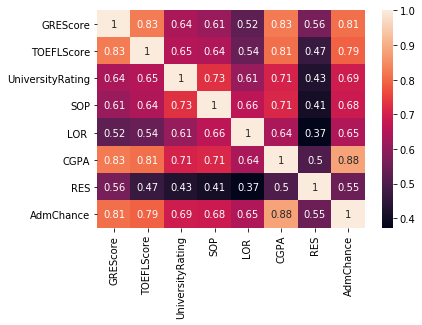

In [0]:
corr = raw_df.corr()
ax = sns.heatmap(corr, annot=True)

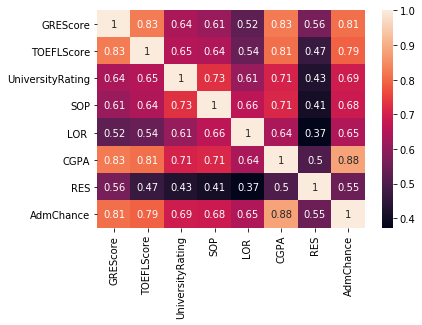

In [0]:
stats = raw_df.describe().transpose()
norm = (raw_df - stats['mean']) / stats['std']
corr = norm.corr()
ax = sns.heatmap(corr, annot=True)

In [0]:
x_train = raw_df.sample(frac=0.8,random_state=0)
x_test = raw_df.drop(x_train.index)
y_train = x_train.pop('AdmChance')
y_test = x_test.pop('AdmChance')
raw_df = raw_df.drop(labels='AdmChance',axis=1)
stats = raw_df.describe().transpose()

In [0]:
def norm(x):
  return (x - stats['mean']) / stats['std']
x_train = norm(x_train)
x_test = norm(x_test)

In [0]:
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(100, activation='relu',input_shape=[len(x_train.columns)]))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(1))
    
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae','mse'])
    
    return model

model = build_model()

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(x_train, y_train, epochs=500, verbose=1, validation_split=0.2 ,callbacks=[tfdocs.modeling.EpochDots()])

Train on 320 samples, validate on 80 samples
Epoch 1/500
 32/320 [==>...........................] - ETA: 3s - loss: 5000.3345 - mae: 68.9430 - mse: 5000.3345
Epoch: 0, loss:5243.4439,  mae:71.0911,  mse:5243.4434,  val_loss:5080.7767,  val_mae:69.8159,  val_mse:5080.7764,  
320/320 [==============================] - 1s 2ms/sample - loss: 5243.4439 - mae: 71.0911 - mse: 5243.4434 - val_loss: 5080.7767 - val_mae: 69.8159 - val_mse: 5080.7764
Epoch 2/500
320/320 [==============================] - 0s 112us/sample - loss: 5041.6933 - mae: 69.6565 - mse: 5041.6943 - val_loss: 4848.3879 - val_mae: 68.1131 - val_mse: 4848.3877
Epoch 3/500
320/320 [==============================] - 0s 116us/sample - loss: 4768.6271 - mae: 67.6327 - mse: 4768.6270 - val_loss: 4510.8977 - val_mae: 65.5707 - val_mse: 4510.8975
Epoch 4/500
320/320 [==============================] - 0s 141us/sample - loss: 4367.6013 - mae: 64.5667 - mse: 4367.6016 - val_loss: 4040.2672 - val_mae: 61.8179 - val_mse: 4040.2671
Epoch 5

320/320 [==============================] - 0s 119us/sample - loss: 55.5761 - mae: 5.8797 - mse: 55.5761 - val_loss: 74.0326 - val_mae: 6.5572 - val_mse: 74.0326
Epoch 46/500
320/320 [==============================] - 0s 119us/sample - loss: 54.8189 - mae: 5.8279 - mse: 54.8189 - val_loss: 73.0607 - val_mae: 6.4920 - val_mse: 73.0607
Epoch 47/500
320/320 [==============================] - 0s 106us/sample - loss: 53.7017 - mae: 5.7482 - mse: 53.7017 - val_loss: 72.1037 - val_mae: 6.4645 - val_mse: 72.1037
Epoch 48/500
320/320 [==============================] - 0s 106us/sample - loss: 53.0468 - mae: 5.7134 - mse: 53.0468 - val_loss: 70.9449 - val_mae: 6.4182 - val_mse: 70.9449
Epoch 49/500
320/320 [==============================] - 0s 109us/sample - loss: 52.5294 - mae: 5.6745 - mse: 52.5294 - val_loss: 68.8685 - val_mae: 6.3463 - val_mse: 68.8685
Epoch 50/500
320/320 [==============================] - 0s 112us/sample - loss: 51.7950 - mae: 5.6290 - mse: 51.7950 - val_loss: 68.7446 - val_

320/320 [==============================] - 0s 106us/sample - loss: 39.5676 - mae: 4.7809 - mse: 39.5676 - val_loss: 51.1408 - val_mae: 5.4790 - val_mse: 51.1408
Epoch 93/500
320/320 [==============================] - 0s 109us/sample - loss: 39.3829 - mae: 4.7593 - mse: 39.3829 - val_loss: 50.8096 - val_mae: 5.4676 - val_mse: 50.8096
Epoch 94/500
320/320 [==============================] - 0s 106us/sample - loss: 39.2303 - mae: 4.7526 - mse: 39.2303 - val_loss: 50.6859 - val_mae: 5.4708 - val_mse: 50.6859
Epoch 95/500
320/320 [==============================] - 0s 100us/sample - loss: 39.0569 - mae: 4.7379 - mse: 39.0569 - val_loss: 50.4830 - val_mae: 5.4335 - val_mse: 50.4831
Epoch 96/500
320/320 [==============================] - 0s 109us/sample - loss: 38.9572 - mae: 4.7371 - mse: 38.9572 - val_loss: 50.2906 - val_mae: 5.4353 - val_mse: 50.2906
Epoch 97/500
320/320 [==============================] - 0s 112us/sample - loss: 38.9066 - mae: 4.7207 - mse: 38.9066 - val_loss: 50.1400 - val_

Epoch 138/500
320/320 [==============================] - 0s 103us/sample - loss: 35.3594 - mae: 4.4125 - mse: 35.3594 - val_loss: 46.3317 - val_mae: 5.1397 - val_mse: 46.3317
Epoch 139/500
320/320 [==============================] - 0s 100us/sample - loss: 35.3877 - mae: 4.4346 - mse: 35.3877 - val_loss: 45.2746 - val_mae: 5.1197 - val_mse: 45.2746
Epoch 140/500
320/320 [==============================] - 0s 106us/sample - loss: 34.9358 - mae: 4.4268 - mse: 34.9358 - val_loss: 45.6289 - val_mae: 5.1216 - val_mse: 45.6289
Epoch 141/500
320/320 [==============================] - 0s 103us/sample - loss: 35.0767 - mae: 4.3868 - mse: 35.0767 - val_loss: 46.3581 - val_mae: 5.1427 - val_mse: 46.3581
Epoch 142/500
320/320 [==============================] - 0s 103us/sample - loss: 35.0176 - mae: 4.4088 - mse: 35.0176 - val_loss: 45.3525 - val_mae: 5.1115 - val_mse: 45.3525
Epoch 143/500
320/320 [==============================] - 0s 100us/sample - loss: 34.9103 - mae: 4.4116 - mse: 34.9103 - val_l

Epoch 185/500
320/320 [==============================] - 0s 103us/sample - loss: 33.5115 - mae: 4.2601 - mse: 33.5115 - val_loss: 44.3881 - val_mae: 4.9699 - val_mse: 44.3881
Epoch 186/500
320/320 [==============================] - 0s 109us/sample - loss: 32.9705 - mae: 4.2465 - mse: 32.9705 - val_loss: 43.2462 - val_mae: 4.9552 - val_mse: 43.2462
Epoch 187/500
320/320 [==============================] - 0s 112us/sample - loss: 32.7609 - mae: 4.2737 - mse: 32.7609 - val_loss: 42.9378 - val_mae: 4.9372 - val_mse: 42.9378
Epoch 188/500
320/320 [==============================] - 0s 119us/sample - loss: 33.0941 - mae: 4.2427 - mse: 33.0941 - val_loss: 43.4309 - val_mae: 4.9842 - val_mse: 43.4309
Epoch 189/500
320/320 [==============================] - 0s 116us/sample - loss: 33.0135 - mae: 4.2253 - mse: 33.0135 - val_loss: 43.7369 - val_mae: 4.9884 - val_mse: 43.7369
Epoch 190/500
320/320 [==============================] - 0s 119us/sample - loss: 32.9427 - mae: 4.2815 - mse: 32.9427 - val_l

Epoch 231/500
320/320 [==============================] - 0s 116us/sample - loss: 31.0295 - mae: 4.1230 - mse: 31.0295 - val_loss: 42.2977 - val_mae: 4.8826 - val_mse: 42.2977
Epoch 232/500
320/320 [==============================] - 0s 100us/sample - loss: 30.7037 - mae: 4.0404 - mse: 30.7037 - val_loss: 43.1473 - val_mae: 4.9008 - val_mse: 43.1473
Epoch 233/500
320/320 [==============================] - 0s 103us/sample - loss: 31.0074 - mae: 4.0601 - mse: 31.0074 - val_loss: 43.2101 - val_mae: 4.9181 - val_mse: 43.2101
Epoch 234/500
320/320 [==============================] - 0s 100us/sample - loss: 30.6548 - mae: 4.0614 - mse: 30.6548 - val_loss: 41.9655 - val_mae: 4.8628 - val_mse: 41.9655
Epoch 235/500
320/320 [==============================] - 0s 100us/sample - loss: 30.5262 - mae: 4.0552 - mse: 30.5262 - val_loss: 43.2397 - val_mae: 4.9113 - val_mse: 43.2397
Epoch 236/500
320/320 [==============================] - 0s 109us/sample - loss: 30.9833 - mae: 4.0321 - mse: 30.9833 - val_l

Epoch 278/500
320/320 [==============================] - 0s 106us/sample - loss: 28.8471 - mae: 3.9467 - mse: 28.8471 - val_loss: 42.7789 - val_mae: 4.8855 - val_mse: 42.7789
Epoch 279/500
320/320 [==============================] - 0s 100us/sample - loss: 28.8319 - mae: 3.9588 - mse: 28.8319 - val_loss: 42.4135 - val_mae: 4.8499 - val_mse: 42.4136
Epoch 280/500
320/320 [==============================] - 0s 106us/sample - loss: 28.7731 - mae: 3.8615 - mse: 28.7731 - val_loss: 42.4377 - val_mae: 4.8693 - val_mse: 42.4377
Epoch 281/500
320/320 [==============================] - 0s 109us/sample - loss: 28.8184 - mae: 3.9516 - mse: 28.8184 - val_loss: 41.5575 - val_mae: 4.8339 - val_mse: 41.5575
Epoch 282/500
320/320 [==============================] - 0s 97us/sample - loss: 28.8407 - mae: 3.8963 - mse: 28.8407 - val_loss: 43.1146 - val_mae: 4.9018 - val_mse: 43.1146
Epoch 283/500
320/320 [==============================] - 0s 97us/sample - loss: 28.4717 - mae: 3.8854 - mse: 28.4717 - val_los

Epoch 324/500
320/320 [==============================] - 0s 100us/sample - loss: 26.2496 - mae: 3.7158 - mse: 26.2496 - val_loss: 43.4099 - val_mae: 4.9297 - val_mse: 43.4099
Epoch 325/500
320/320 [==============================] - 0s 100us/sample - loss: 26.1971 - mae: 3.7155 - mse: 26.1971 - val_loss: 43.1692 - val_mae: 4.9218 - val_mse: 43.1692
Epoch 326/500
320/320 [==============================] - 0s 97us/sample - loss: 26.2555 - mae: 3.6877 - mse: 26.2555 - val_loss: 44.0959 - val_mae: 4.9413 - val_mse: 44.0959
Epoch 327/500
320/320 [==============================] - 0s 94us/sample - loss: 26.1523 - mae: 3.6800 - mse: 26.1523 - val_loss: 43.6104 - val_mae: 4.9419 - val_mse: 43.6104
Epoch 328/500
320/320 [==============================] - 0s 109us/sample - loss: 25.9247 - mae: 3.6540 - mse: 25.9247 - val_loss: 43.8224 - val_mae: 4.9493 - val_mse: 43.8224
Epoch 329/500
320/320 [==============================] - 0s 97us/sample - loss: 26.2455 - mae: 3.7156 - mse: 26.2455 - val_loss

Epoch 371/500
320/320 [==============================] - 0s 100us/sample - loss: 24.1766 - mae: 3.5774 - mse: 24.1766 - val_loss: 46.0843 - val_mae: 5.0676 - val_mse: 46.0843
Epoch 372/500
320/320 [==============================] - 0s 103us/sample - loss: 24.2478 - mae: 3.5194 - mse: 24.2478 - val_loss: 45.5544 - val_mae: 5.0889 - val_mse: 45.5544
Epoch 373/500
320/320 [==============================] - 0s 103us/sample - loss: 23.9244 - mae: 3.5432 - mse: 23.9244 - val_loss: 46.3182 - val_mae: 5.0876 - val_mse: 46.3182
Epoch 374/500
320/320 [==============================] - 0s 97us/sample - loss: 24.1698 - mae: 3.5313 - mse: 24.1698 - val_loss: 45.1647 - val_mae: 5.0886 - val_mse: 45.1647
Epoch 375/500
320/320 [==============================] - 0s 103us/sample - loss: 23.6825 - mae: 3.5009 - mse: 23.6825 - val_loss: 47.1014 - val_mae: 5.1107 - val_mse: 47.1014
Epoch 376/500
320/320 [==============================] - 0s 97us/sample - loss: 23.9030 - mae: 3.4952 - mse: 23.9030 - val_los

Epoch 417/500
320/320 [==============================] - 0s 100us/sample - loss: 22.3116 - mae: 3.4185 - mse: 22.3116 - val_loss: 48.4656 - val_mae: 5.2396 - val_mse: 48.4656
Epoch 418/500
320/320 [==============================] - 0s 97us/sample - loss: 21.7037 - mae: 3.3188 - mse: 21.7037 - val_loss: 49.4957 - val_mae: 5.2649 - val_mse: 49.4957
Epoch 419/500
320/320 [==============================] - 0s 97us/sample - loss: 21.7475 - mae: 3.3731 - mse: 21.7475 - val_loss: 49.2250 - val_mae: 5.2555 - val_mse: 49.2250
Epoch 420/500
320/320 [==============================] - 0s 103us/sample - loss: 21.6795 - mae: 3.3198 - mse: 21.6795 - val_loss: 48.2388 - val_mae: 5.2415 - val_mse: 48.2388
Epoch 421/500
320/320 [==============================] - 0s 103us/sample - loss: 21.6062 - mae: 3.3368 - mse: 21.6062 - val_loss: 48.2670 - val_mae: 5.2478 - val_mse: 48.2670
Epoch 422/500
320/320 [==============================] - 0s 103us/sample - loss: 21.4167 - mae: 3.3093 - mse: 21.4167 - val_los

Epoch 464/500
320/320 [==============================] - 0s 100us/sample - loss: 20.4310 - mae: 3.2137 - mse: 20.4310 - val_loss: 51.6668 - val_mae: 5.3944 - val_mse: 51.6668
Epoch 465/500
320/320 [==============================] - 0s 100us/sample - loss: 19.8071 - mae: 3.2008 - mse: 19.8071 - val_loss: 51.6086 - val_mae: 5.4431 - val_mse: 51.6086
Epoch 466/500
320/320 [==============================] - 0s 100us/sample - loss: 19.9746 - mae: 3.1763 - mse: 19.9746 - val_loss: 51.9780 - val_mae: 5.4345 - val_mse: 51.9780
Epoch 467/500
320/320 [==============================] - 0s 97us/sample - loss: 19.7158 - mae: 3.1708 - mse: 19.7158 - val_loss: 53.2036 - val_mae: 5.4396 - val_mse: 53.2036
Epoch 468/500
320/320 [==============================] - 0s 97us/sample - loss: 19.9888 - mae: 3.2210 - mse: 19.9888 - val_loss: 52.3953 - val_mae: 5.4339 - val_mse: 52.3953
Epoch 469/500
320/320 [==============================] - 0s 97us/sample - loss: 19.7718 - mae: 3.1710 - mse: 19.7718 - val_loss

In [0]:
error = model.evaluate(x_test, y_test, verbose=2)

100/100 - 0s - loss: 49.2373 - mae: 4.7809 - mse: 49.2373


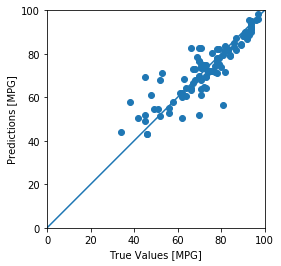

In [0]:
prediction = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

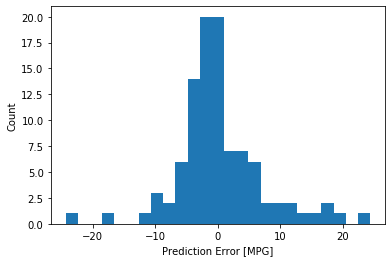

In [0]:
error = prediction - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")